YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


<Figure size 1000x500 with 0 Axes>

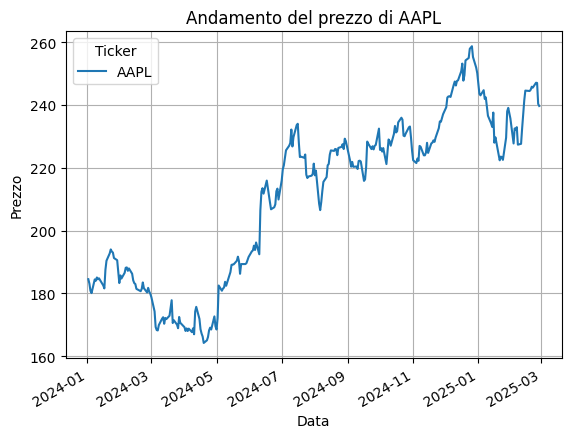

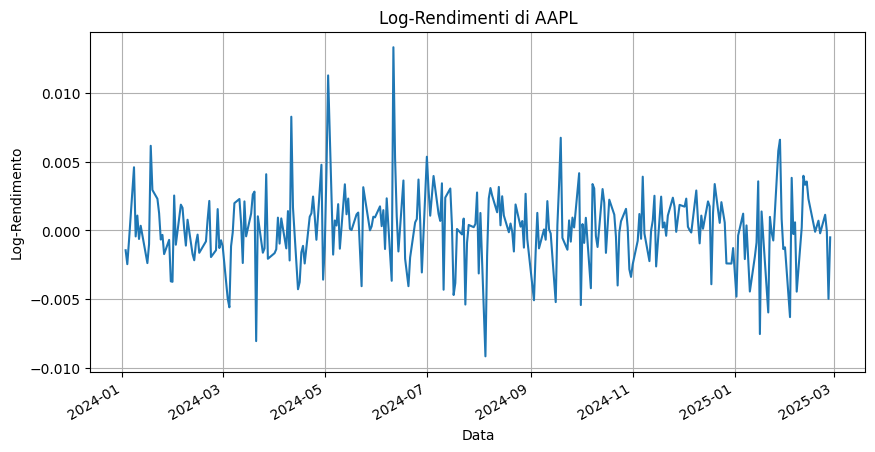

Statistiche dei log-rendimenti di AAPL:
---------------------------------------
Media: 0.000173
Deviazione Standard: 0.002737
Asimmetria (Skewness): 0.271322
Curtosi (Excess Kurtosis): 2.832006

Test di normalità - Shapiro-Wilk:
  Statistica: 0.963176  p-value: 0.000001
Test di normalità - Jarque-Bera:
  Statistica: 100.123123  p-value: 0.000000



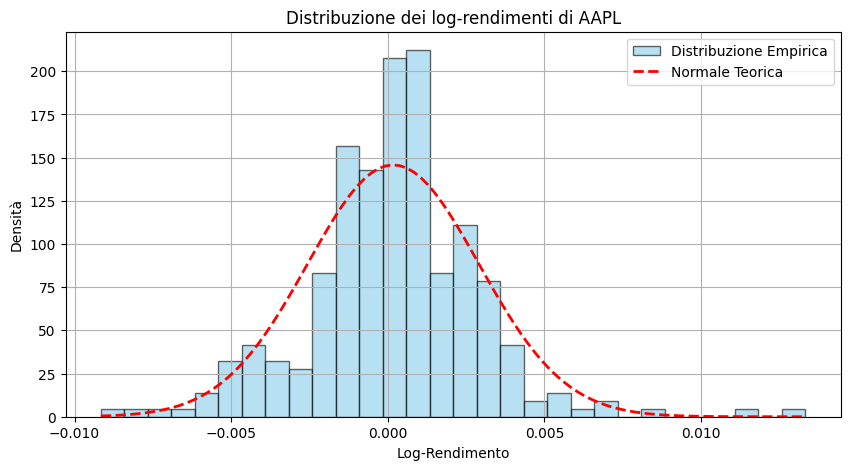

<Figure size 800x600 with 0 Axes>

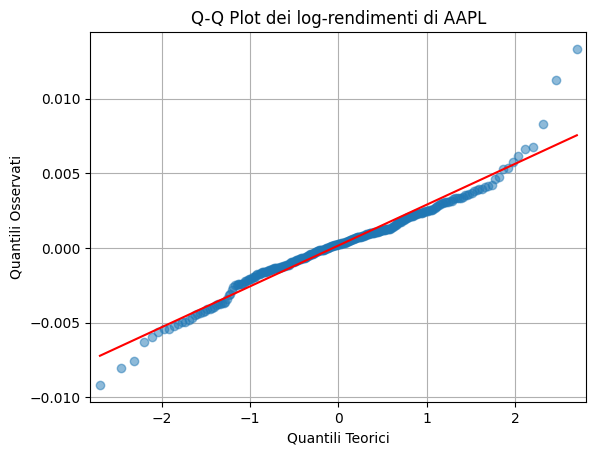

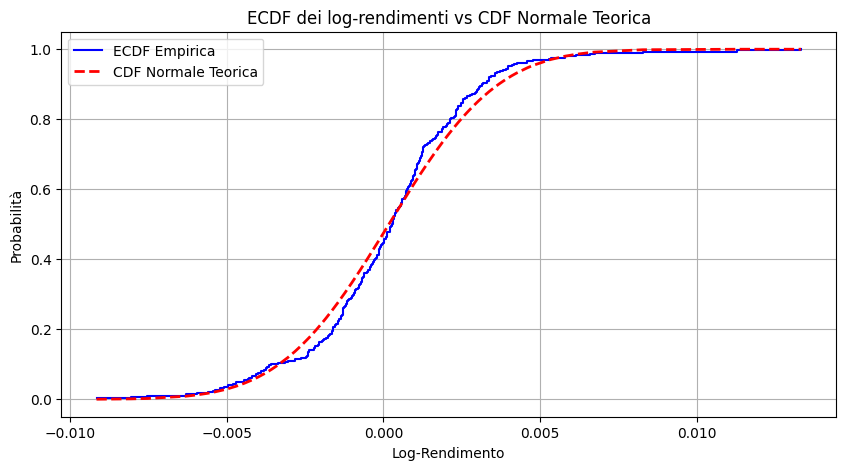

Analisi delle probabilità:
---------------------------
Probabilità empirica di log-rendimento < -0.02: 0.0000
Probabilità teorica (normale) di log-rendimento < -0.02: 0.0000


In [1]:
### -----------------------  ANALISI RENDIMENTI


import pandas as pd       # Importiamo alcune librerie
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import shapiro, jarque_bera, skew, kurtosis, norm
import statsmodels.api as sm

stocks = ['AAPL']                       # Definiamo il ticker
start = datetime(2024, 1, 1)              # Data di inizio del record
data = yf.download(stocks, start=start)   # Scarichiamo i dati

close = data.loc[:, "Close"]
# Plottiamo
plt.figure(figsize=(10, 5))
close.plot(title="Andamento del prezzo di AAPL")
plt.xlabel("Data")
plt.ylabel("Prezzo")
plt.grid(True)
plt.show()

close = close.squeeze() # Convertiamo in Series perchè è un dataFrame
log_returns = np.log(close).pct_change()

# Creiamo una Series utilizzando come indice le date (escludendo la prima data)
returns = pd.Series(log_returns, index=close.index[1:])

# Plottiamo i log-rendimenti nel tempo
plt.figure(figsize=(10, 5))
returns.plot(title="Log-Rendimenti di AAPL")
plt.xlabel("Data")
plt.ylabel("Log-Rendimento")
plt.grid(True)
plt.show()


### Calcolo delle statistiche

media = returns.mean()
dev_std = returns.std()  # Deviazione standard campionaria
asimmetria = skew(returns)
curtosi = kurtosis(returns)  # Curtosi in eccesso (0 per una normale)

print("Statistiche dei log-rendimenti di AAPL:")
print("---------------------------------------")
print(f"Media: {media:.6f}")
print(f"Deviazione Standard: {dev_std:.6f}")
print(f"Asimmetria (Skewness): {asimmetria:.6f}")
print(f"Curtosi (Excess Kurtosis): {curtosi:.6f}\n")

### Test di normalità
shapiro_stat, shapiro_p = shapiro(returns) # Test di Shapiro-Wilk
jb_stat, jb_p = jarque_bera(returns) # Test di Jarque-Bera

print("Test di normalità - Shapiro-Wilk:")
print(f"  Statistica: {shapiro_stat:.6f}  p-value: {shapiro_p:.6f}")
print("Test di normalità - Jarque-Bera:")
print(f"  Statistica: {jb_stat:.6f}  p-value: {jb_p:.6f}\n")


### Visualizzazione della distribuzione dei log-rendimenti
# -------------------------
plt.figure(figsize=(10, 5))
# Istogramma dei log-rendimenti (densità)
n, bins, patches = plt.hist(returns, bins=30, density=True, alpha=0.6,
                            color='skyblue', edgecolor='black', label='Distribuzione Empirica')

### Calcolo della curva della distribuzione normale teorica
x = np.linspace(bins[0], bins[-1], 100)
plt.plot(x, norm.pdf(x, media, dev_std), 'r--', linewidth=2, label='Normale Teorica')

plt.title("Distribuzione dei log-rendimenti di AAPL")
plt.xlabel("Log-Rendimento")
plt.ylabel("Densità")
plt.legend()
plt.grid(True)
plt.show()

# -------------------------
### Q–Q plot per la verifica della normalità
#
plt.figure(figsize=(8, 6))
sm.qqplot(returns, line='s', marker='o', alpha=0.5)
plt.title("Q-Q Plot dei log-rendimenti di AAPL")
plt.xlabel("Quantili Teorici")
plt.ylabel("Quantili Osservati")
plt.grid(True)
plt.show()

# --------------------------
#  Analisi della funzione di distribuzione empirica(ECDF)
sorted_returns = np.sort(returns)
n_points = len(sorted_returns)
ecdf = np.arange(1, n_points+1) / n_points

plt.figure(figsize=(10, 5))
plt.step(sorted_returns, ecdf, where='post', label='ECDF Empirica', color='blue')

# Calcolo della CDF della normale teorica usando i parametri stimati
cdf_theoretical = norm.cdf(sorted_returns, loc=media, scale=dev_std)
plt.plot(sorted_returns, cdf_theoretical, 'r--', label='CDF Normale Teorica', linewidth=2)

plt.title("ECDF dei log-rendimenti vs CDF Normale Teorica")
plt.xlabel("Log-Rendimento")
plt.ylabel("Probabilità")
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
#  Analisi delle probabilità in termini di quantili
# ---------------------------
# Ad esempio: calcoliamo la probabilità di osservare un log-rendimento inferiore a -0.02
threshold = -0.02
prob_empirica = np.mean(returns < threshold)
prob_theoretical = norm.cdf(threshold, loc=media, scale=dev_std)

print("Analisi delle probabilità:")
print("---------------------------")
print(f"Probabilità empirica di log-rendimento < {threshold}: {prob_empirica:.4f}")
print(f"Probabilità teorica (normale) di log-rendimento < {threshold}: {prob_theoretical:.4f}")


[*********************100%***********************]  1 of 1 completed


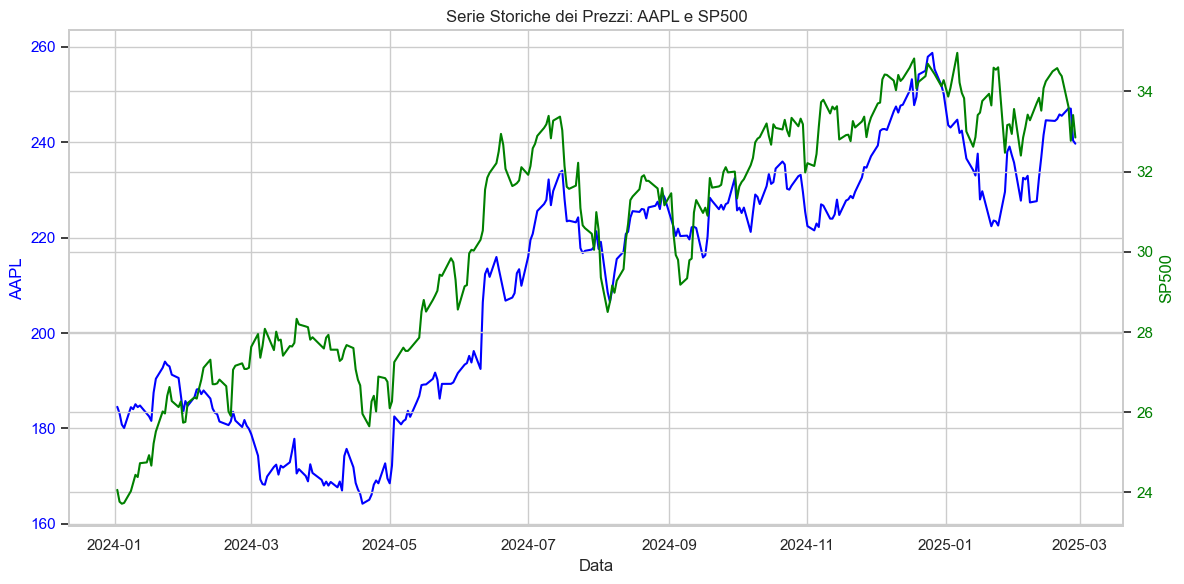

                            OLS Regression Results                            
Dep. Variable:                   AAPL   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     40.60
Date:                Thu, 27 Feb 2025   Prob (F-statistic):           7.53e-10
Time:                        20:57:57   Log-Likelihood:                 1295.5
No. Observations:                 285   AIC:                            -2587.
Df Residuals:                     283   BIC:                            -2580.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.000      0.740   

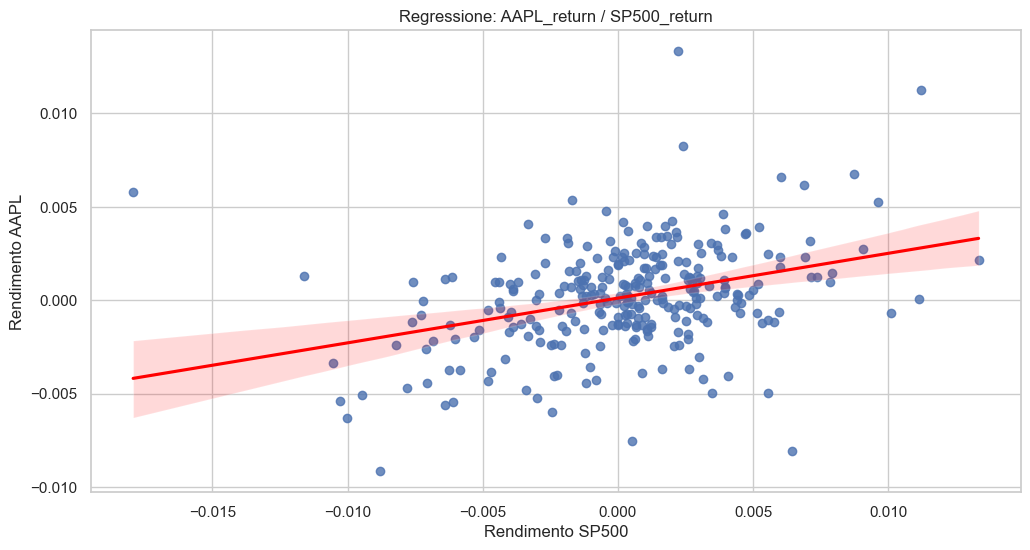

Text(0.5, 1.0, 'Istogramma dei Residui')

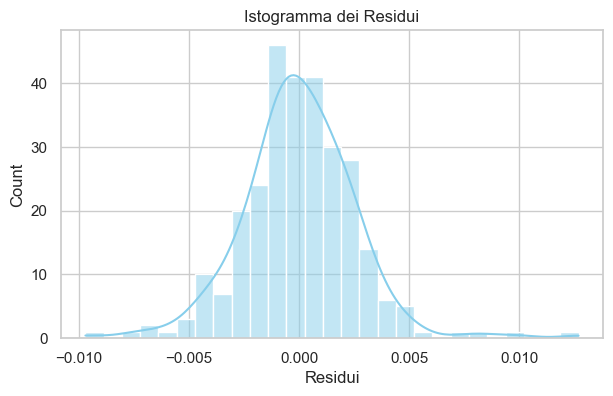

In [2]:
### -----------------------  ANALISI DI REGRESSIONE DEI RENDIMENTI AAPL/SP500

# Impostazioni grafiche per i plot
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

ticker2 = "IE00B3WJKG14"
AAPL_close = close
SP500_close = yf.download(ticker2, start=start)["Close"].squeeze()

# Grafico con doppio asse Y
fig, ax1 = plt.subplots(figsize=(12, 6))

# Asse principale per AAPL
color_aapl = "blue"
ax1.set_xlabel("Data")
ax1.set_ylabel("AAPL", color=color_aapl)
ax1.plot(AAPL_close.index, AAPL_close, label="AAPL", color=color_aapl)
ax1.tick_params(axis="y", labelcolor=color_aapl)

# Asse secondario per SP500
ax2 = ax1.twinx()  # Crea un secondo asse Y che condivide l'asse X
color_sp500 = "green"
ax2.set_ylabel("SP500", color=color_sp500)
ax2.plot(SP500_close.index, SP500_close, label="SP500", color=color_sp500)
ax2.tick_params(axis="y", labelcolor=color_sp500)

plt.title("Serie Storiche dei Prezzi: AAPL e SP500")
fig.tight_layout()
plt.show()

# Calcolo dei rendimenti giornalieri
AAPL_rend = np.log(AAPL_close).pct_change().dropna().squeeze()
SP500_rend = np.log( SP500_close).pct_change().dropna().squeeze()

AAPL_rend, SP500_rend = AAPL_rend.align(SP500_rend, join="inner")


# Creazione e stima del modello di regressione OLS
X = SP500_rend  # Variabile indipendente
y = AAPL_rend   # Variabile dipendente

X_const = sm.add_constant(X)
model = sm.OLS(y, X_const).fit()

print(model.summary())

# Plot della retta di regressione sovrapposta allo scatter plot
plt.figure()
sns.regplot(x=SP500_rend, y=AAPL_rend, line_kws={"color": "red"})
plt.xlabel("Rendimento SP500")
plt.ylabel("Rendimento AAPL")
plt.title("Regressione: AAPL_return / SP500_return")
plt.show()

# Analisi dei residui
residuals = model.resid.squeeze()      # Residui come Series monodimensionale
fitted = model.fittedvalues.squeeze()    # Valori fittati come Series

# Istogramma dei residui con curva di densità per verificare la normalità
plt.figure(figsize=(7, 4))
sns.histplot(residuals, kde=True, color="skyblue")
plt.xlabel("Residui")
plt.title("Istogramma dei Residui")


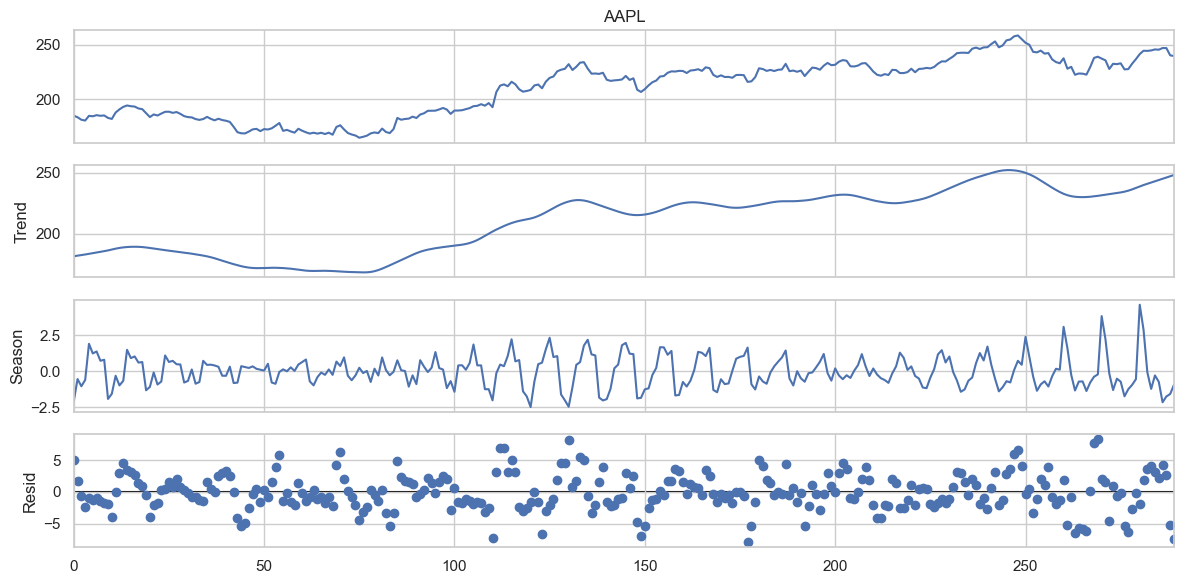

In [3]:
### -----------------------------   SCOMPOSIZIONE STL

from statsmodels.tsa.seasonal import STL
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller

close.index = [i for i in range(close.shape[0])] # aggiustiamo gli indici dei prezzi
res = STL(close,10,13,21).fit() # effettuiamo la scomposizione

res.plot()
plt.show()



In [4]:
### ---------- TEST STAZIONARIETA'

adfuller(close)

(np.float64(-0.927274464912252),
 np.float64(0.7788579188450706),
 0,
 289,
 {'1%': np.float64(-3.4531816058796143),
  '5%': np.float64(-2.871593390724642),
  '10%': np.float64(-2.5721268156511536)},
 np.float64(1395.2186188348928))

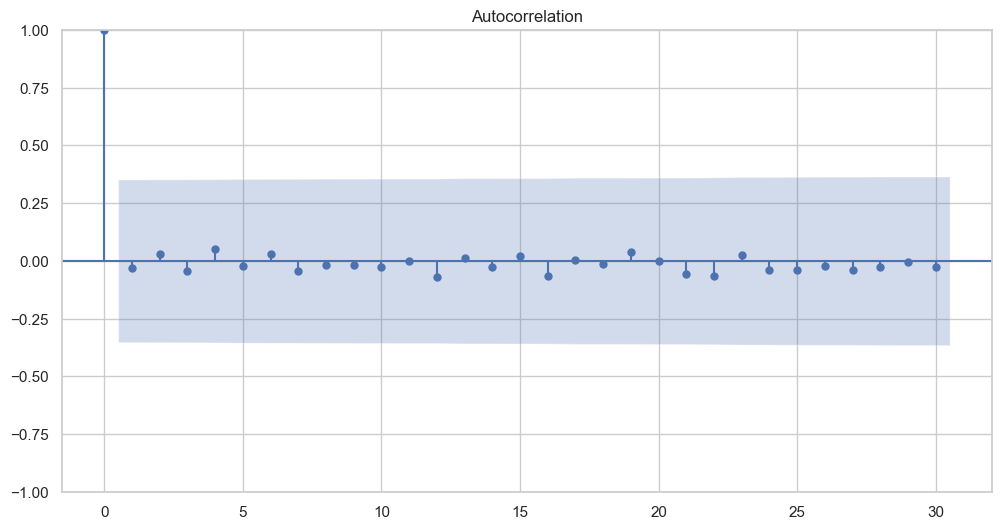

In [5]:
### ---------- WHITE NOISE (TEST BIANCHEZZA)
np.random.seed(1)
whiteNoise = np.random.standard_normal(1000)

acf_coef = acf(whiteNoise)
plot_acf(acf_coef, lags=30)
plt.show()


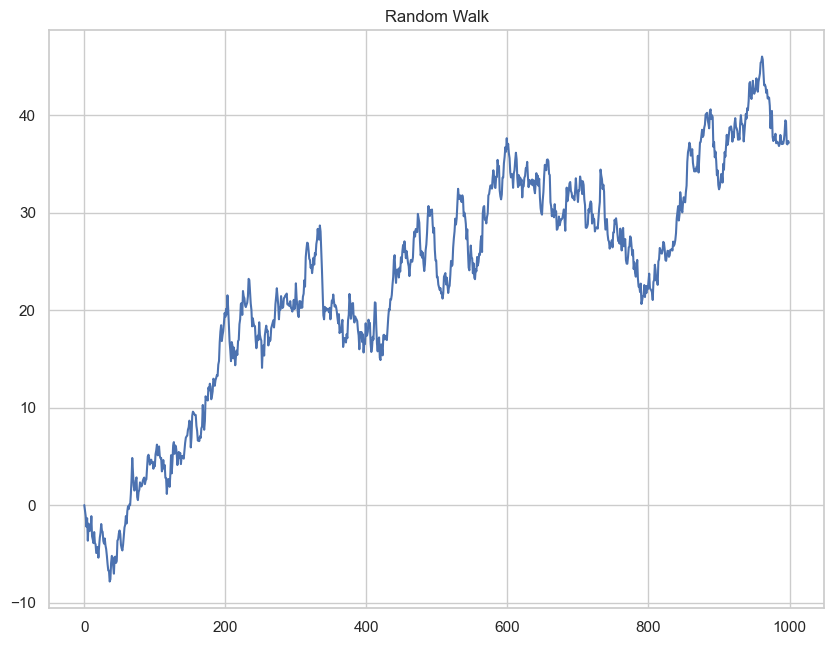

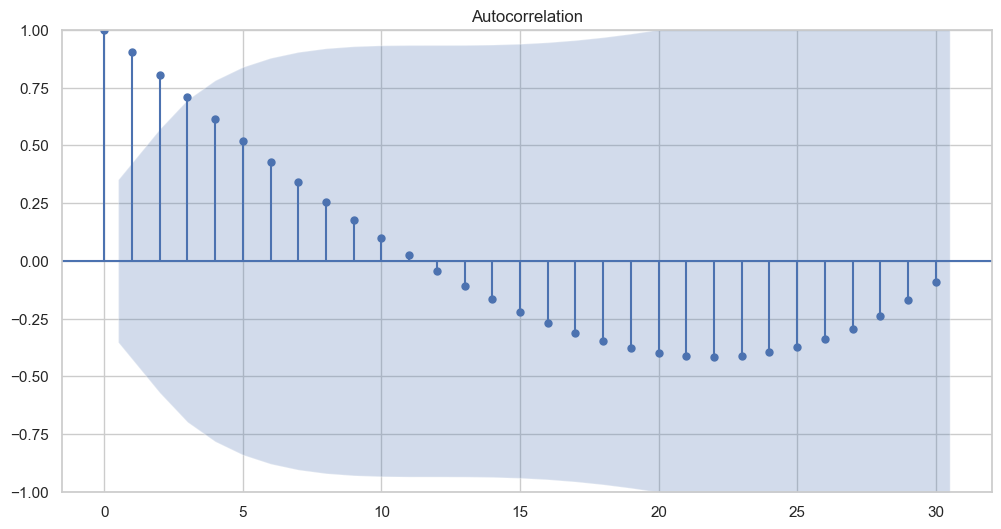

In [6]:
### --------------------------- RANDOM WALK

np.random.seed(1)
steps = np.random.standard_normal(1000)
steps[0] = 0
random_walk = np.cumsum(steps)
plt.figure(figsize=[10, 7.5]);
plt.plot(random_walk)
plt.title("Random Walk")
plt.show()
acf_coef = acf(random_walk)
plot_acf(acf_coef, lags=30)
plt.show()

Test RMSE: 3.27169


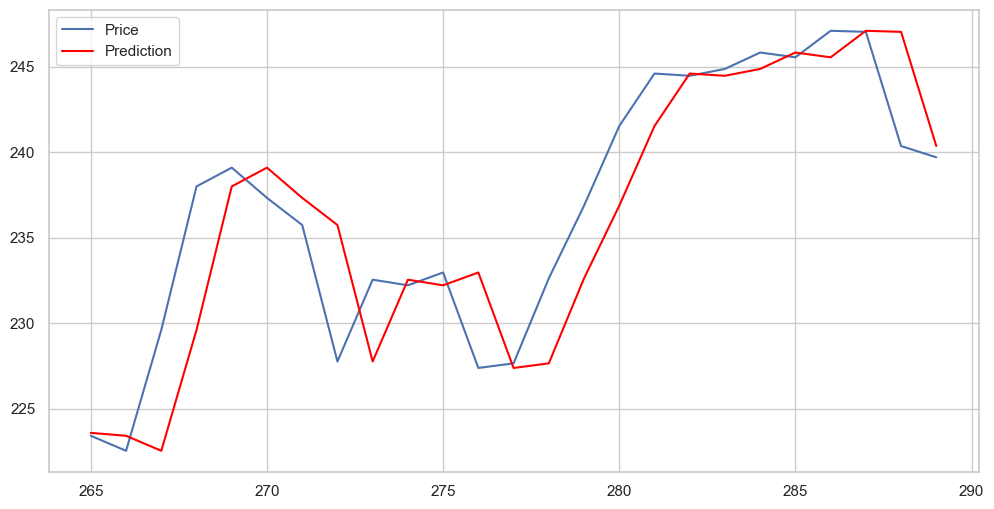

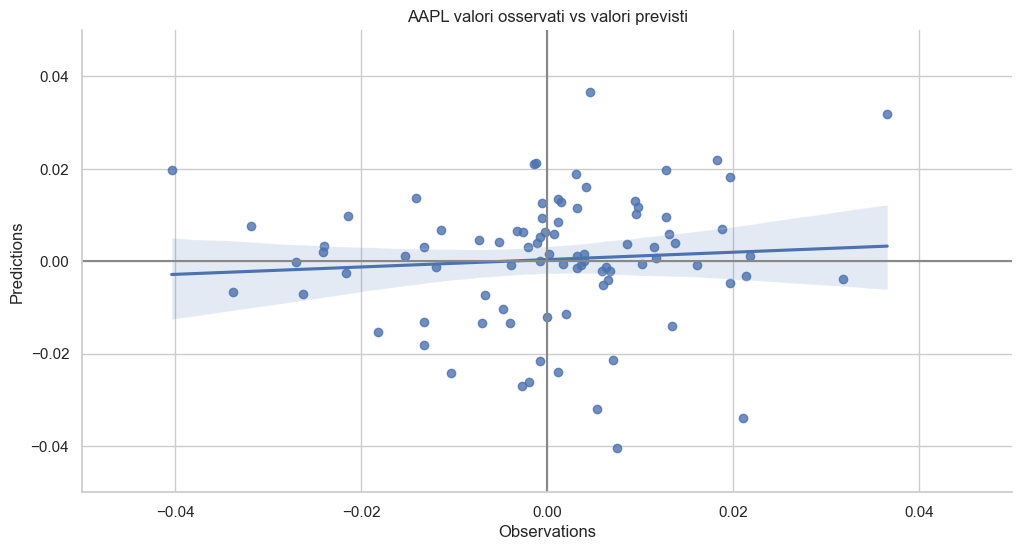

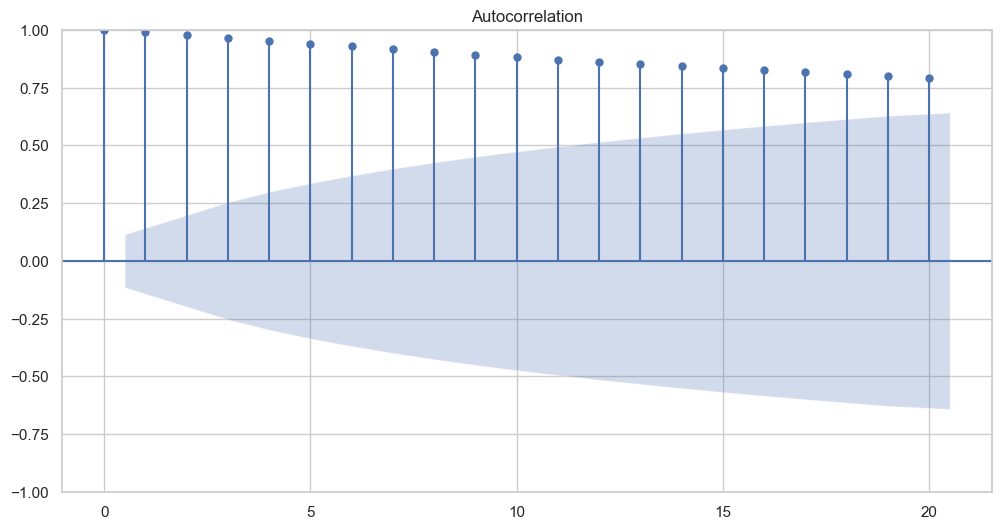

In [9]:
#####---------------------------- MODELLO DI PERSISTENZA
from sklearn.metrics import mean_squared_error

predictions = close.shift(1)
RMSE = np.sqrt(mean_squared_error(close[int(len(close) * 0.7):], predictions.iloc[int(len(close) * 0.7):])) # RMSE
print('Test RMSE: %.5f' % RMSE)
plt.plot(close.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()


rend_close=close.pct_change()
rend_predictions=predictions.pct_change()

plt.show()
price_pred = pd.concat([rend_close.iloc[-int(len(close) * 0.3):], rend_predictions.iloc[-int(len(close) * 0.3):]], axis=1)

price_pred.columns = ['Price', 'Prediction']
fig, ax = plt.subplots()
ax = sns.regplot(data=price_pred, x=price_pred['Price'], y=price_pred['Prediction'])
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('AAPL valori osservati vs valori previsti')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

plt.show()
acf_coef=acf(close)
plot_acf(close, lags=20)
plt.show()